# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [136]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

# Set Seaborn style
sns.set_style("darkgrid")

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [2]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [3]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)

In [4]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [5]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [6]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [7]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/yx/yknfjrb91cn798sbnbw84nbc0000gn/T/ipykernel_30292/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [8]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


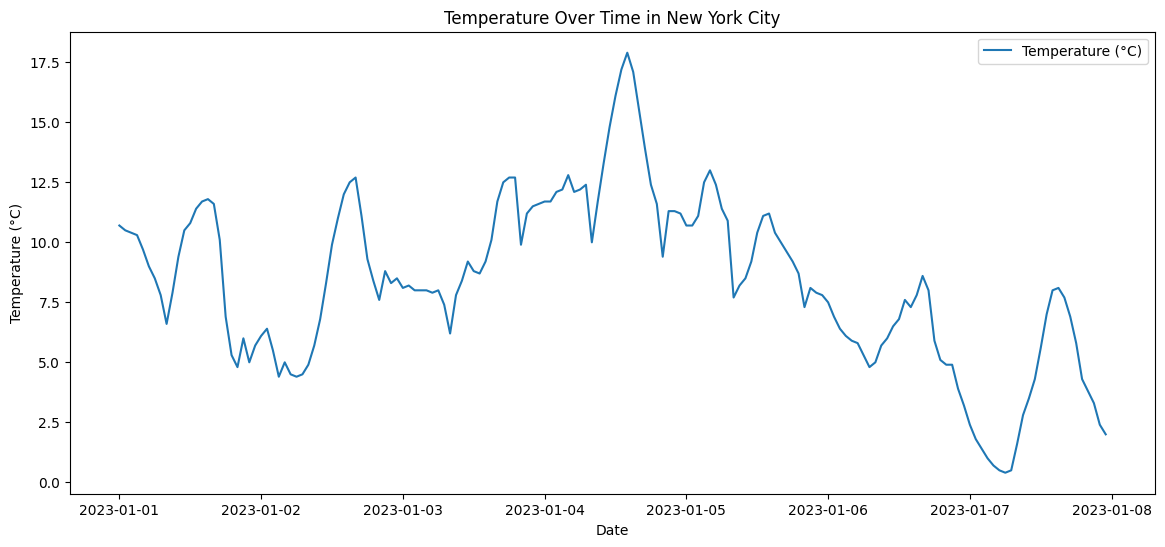

In [9]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

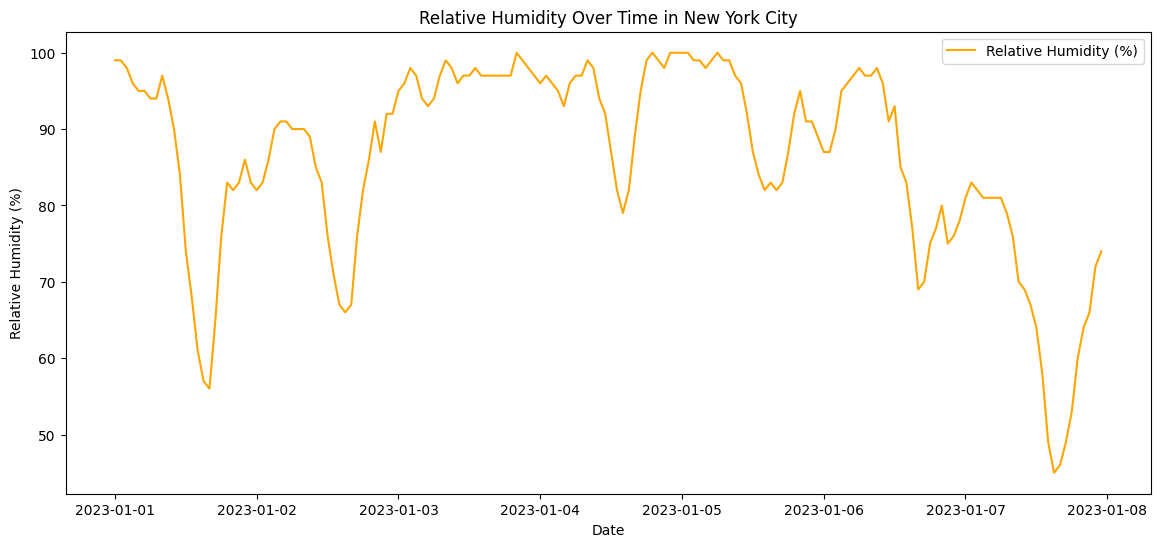

In [10]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


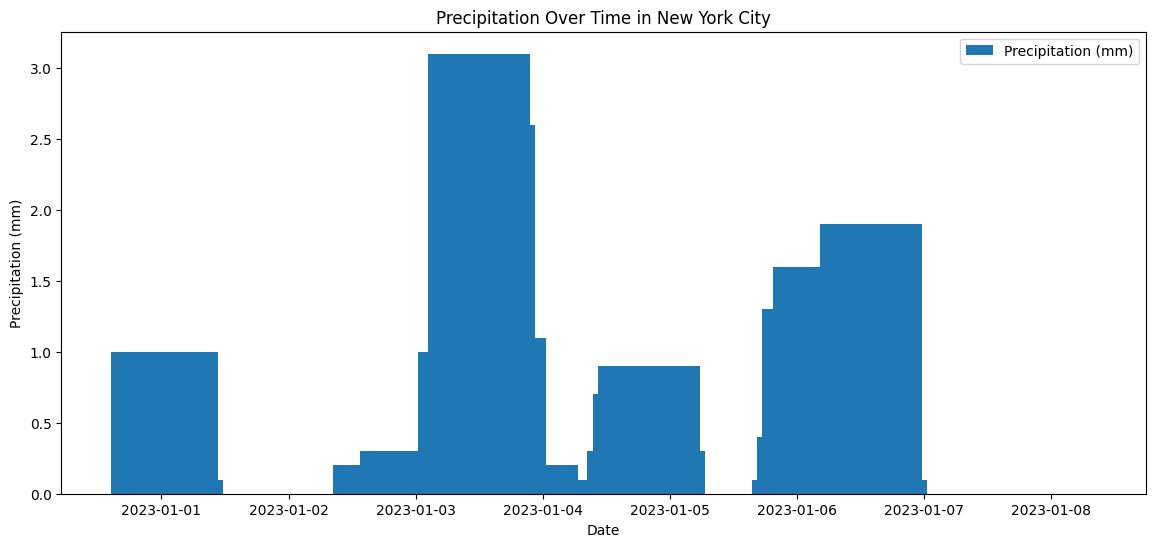

In [11]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [12]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


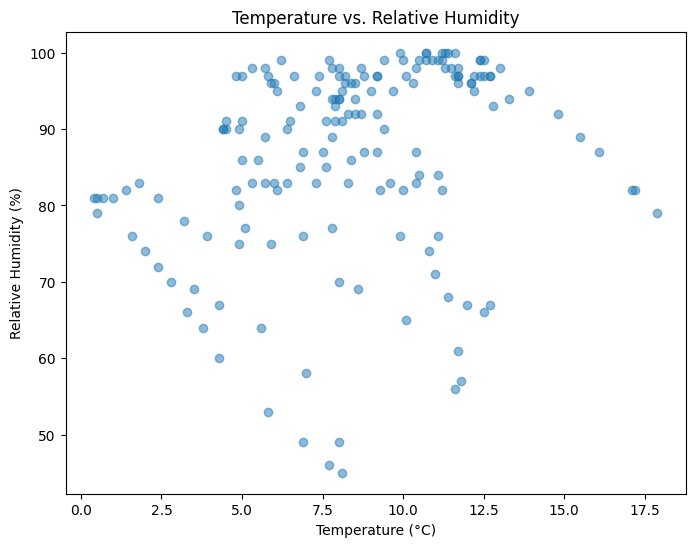

In [13]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [14]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


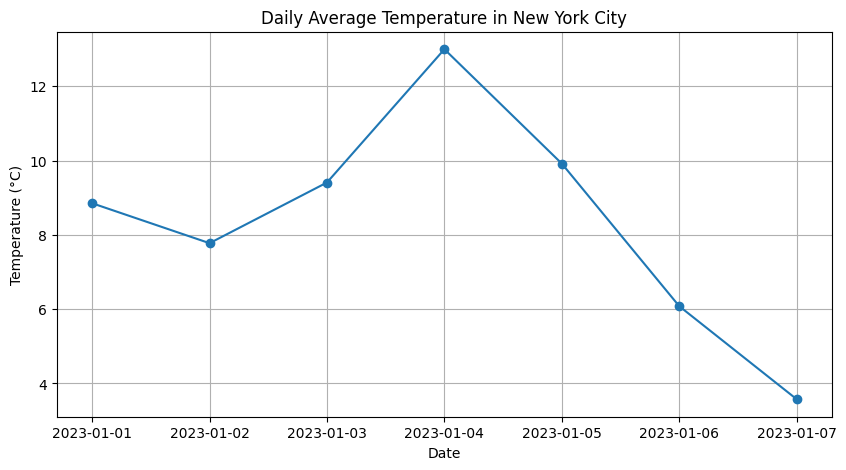

In [15]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [16]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/var/folders/yx/yknfjrb91cn798sbnbw84nbc0000gn/T/ipykernel_30292/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [17]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [18]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


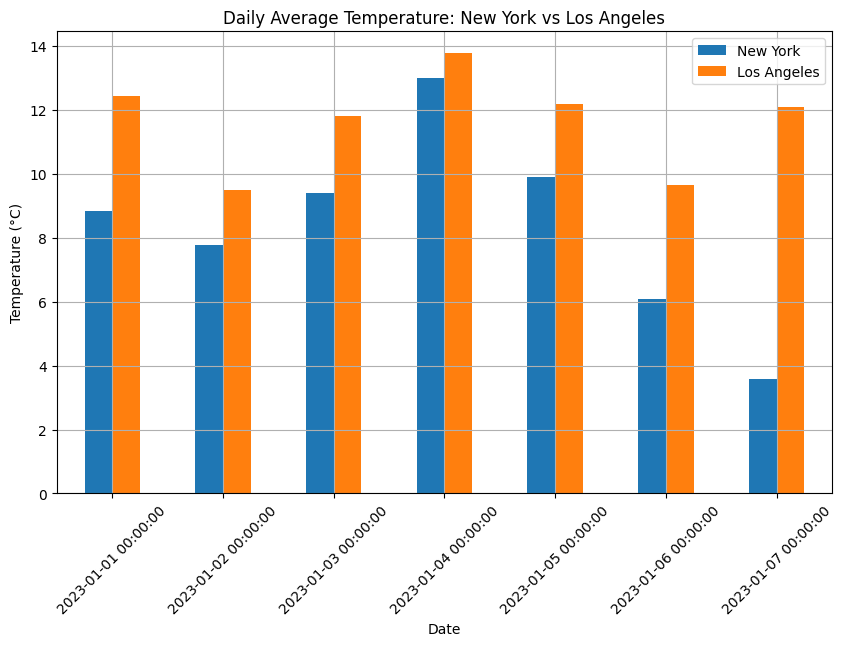

In [19]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [21]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [41]:
# Step 1: Set Up Parameters

city_data = {

    # Location and timezone for London City
    'london': {
        'latitude': 51.5074,
        'longitude': -0.1278,
        'timezone': 'Europe/London'
    },

    # Location and timezone for Seattle City
    'seattle': {
        'latitude': 47.6062,
        'longitude': -122.3321,
        'timezone': 'America/Los_Angeles'
    }
}

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']
daily_variables = ['precipitation_sum']

In [42]:
# Step 2a: Create a function for api response
def get_api_response(url, params, city):
    
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        print(f'{city}: Data fetched successfully!')
        return response.json()
    else:
        print(f'Failed to fetch data. Status code: {response.status_code}')
        return None

In [43]:
# Step 2: Make the API Request and Store data

base_url = 'https://archive-api.open-meteo.com/v1/archive'

cities = ['london', 'seattle']

for city in cities:
    params = {
        'latitude': city_data[city]['latitude'],
        'longitude': city_data[city]['longitude'],
        'start_date': start_date,
        'end_date': end_date,
        'hourly': ','.join(hourly_variables),
        'daily': ','.join(daily_variables),
        'timezone': city_data[city]['timezone']
    }
    # print(f"Parameters for {city}: {params}")

    data = get_api_response(url=base_url, params=params, city=city)
    
    if data:
        city_data[city]['api_response_units'] = data['hourly_units']
        city_data[city]['api_response_hourly_data'] = data['hourly']
        city_data[city]['api_response_daily_data'] = data['daily']

london: Data fetched successfully!
seattle: Data fetched successfully!


In [45]:
# Check
city_data['london']['api_response_daily_data']

{'time': ['2022-01-01',
  '2022-01-02',
  '2022-01-03',
  '2022-01-04',
  '2022-01-05',
  '2022-01-06',
  '2022-01-07',
  '2022-01-08',
  '2022-01-09',
  '2022-01-10',
  '2022-01-11',
  '2022-01-12',
  '2022-01-13',
  '2022-01-14',
  '2022-01-15',
  '2022-01-16',
  '2022-01-17',
  '2022-01-18',
  '2022-01-19',
  '2022-01-20',
  '2022-01-21',
  '2022-01-22',
  '2022-01-23',
  '2022-01-24',
  '2022-01-25',
  '2022-01-26',
  '2022-01-27',
  '2022-01-28',
  '2022-01-29',
  '2022-01-30',
  '2022-01-31',
  '2022-02-01',
  '2022-02-02',
  '2022-02-03',
  '2022-02-04',
  '2022-02-05',
  '2022-02-06',
  '2022-02-07',
  '2022-02-08',
  '2022-02-09',
  '2022-02-10',
  '2022-02-11',
  '2022-02-12',
  '2022-02-13',
  '2022-02-14',
  '2022-02-15',
  '2022-02-16',
  '2022-02-17',
  '2022-02-18',
  '2022-02-19',
  '2022-02-20',
  '2022-02-21',
  '2022-02-22',
  '2022-02-23',
  '2022-02-24',
  '2022-02-25',
  '2022-02-26',
  '2022-02-27',
  '2022-02-28',
  '2022-03-01',
  '2022-03-02',
  '2022-03-03',


In [108]:
# Step 3: Load Data into pandas DataFrame

# Empty list to store per_city data
list_of_city_df = []

# Store per city data (as dataframes) in list_of_city_df
for city, item in city_data.items():
    city_df = pd.DataFrame(item['api_response_hourly_data'])
    city_df['city'] = city
    list_of_city_df.append(city_df)

# Concat all city data df
df_city_data = pd.concat(list_of_city_df)
print(len(list_of_city_df), list_of_city_df[0].shape)

print(df_city_data.shape)
df_city_data.head()

2 (8760, 5)
(17520, 5)


,time,temperature_2m,relativehumidity_2m,precipitation,city
0,2022-01-01T00:00,12.7,91,0.0,london
1,2022-01-01T01:00,12.7,93,0.0,london
2,2022-01-01T02:00,12.8,93,0.0,london
3,2022-01-01T03:00,12.5,93,0.0,london
4,2022-01-01T04:00,12.3,92,0.0,london


In [109]:
# get relevant columns
df_city_data = df_city_data[['time', 'precipitation', 'city']]

# correct column names
df_city_data.columns = ['date', 'precipitation_hourly_mm', 'city']

# Convert time column to datetime (ensures we can resample in the next step)
df_city_data['date'] = pd.to_datetime(df_city_data['date'])

# Set time column to index
df_city_data.set_index('date', inplace=True)

In [110]:
# Handle missing values
df_city_data.isna().sum()

precipitation_hourly_mm    0
city                       0
dtype: int64

In [111]:
# Check data distribution
df_city_data.groupby('city')['precipitation_hourly_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
london,8760.0,0.075662,0.404500,0.0,0.0,0.0,0.0,14.7
seattle,8760.0,0.129132,0.463708,0.0,0.0,0.0,0.0,7.7


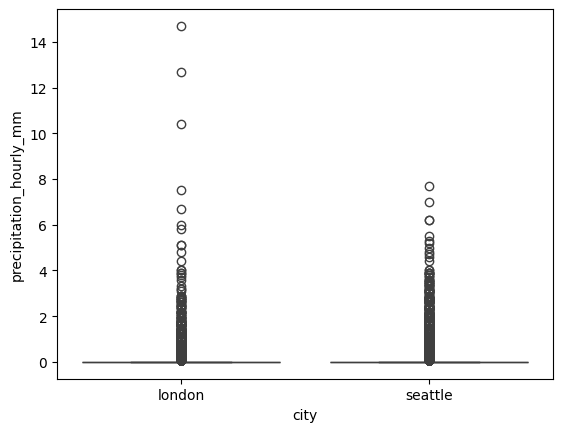

In [112]:
# Check data distribution
sns.boxplot(data=df_city_data, y='precipitation_hourly_mm', x='city', hue='city')
plt.show()

Based on the data above we can see that precipitation on an hourly basis has positive values with most hours of the year being 'dry' aka (no rain). There seem to be a few outliers or heavy precipitation hourly events. 

Looking at precipitation data on a daily or even weekly basis may be more meaningful.

In [210]:
# Group by city and resample weekly, then sum precipitation
df_city_data_weekly = (df_city_data.groupby('city')
                                   .resample('W')
                                   .sum()
                                   [['precipitation_hourly_mm']]
                                   .reset_index())
df_city_data_weekly = df_city_data_weekly.rename(columns={'precipitation_hourly_mm': 'precipitation_weekly_mm',
                                                          'date': 'weekly_date'})
df_city_data_weekly.head()

,city,weekly_date,precipitation_weekly_mm
0,london,2022-01-02,2.2
1,london,2022-01-09,12.9
2,london,2022-01-16,3.1
3,london,2022-01-23,0.0
4,london,2022-01-30,0.1


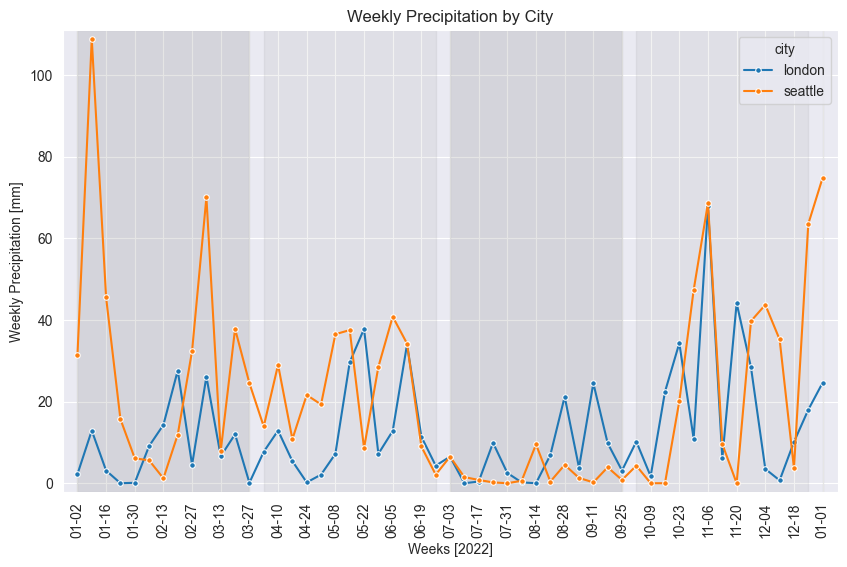

In [213]:
# Plot weekly precipitation data by city

_ = plt.figure(figsize=(10, 6))
_ = sns.lineplot(data=df_city_data_weekly, 
                 x='weekly_date',
                 y='precipitation_weekly_mm', 
                 hue='city', 
                 marker='o', 
                 markersize=4)
_ = plt.xlabel('Weeks [2022]')
_ = plt.ylabel('Weekly Precipitation [mm]')
_ = plt.title('Weekly Precipitation by City')

# Set ticks
ticks = df_city_data_weekly['weekly_date'].unique()[::2]
labels = df_city_data_weekly['weekly_date'].dt.strftime('%m-%d').unique()[::2]
_ = plt.xticks(ticks=ticks, labels=labels, rotation=90)

# Add shaded backgrounds for each quarter
df_city_data_weekly['quarter'] = df_city_data_weekly['weekly_date'].dt.to_period('Q')
quarters = df_city_data_weekly['quarter'].unique()

for q in quarters:
    q_dates = df_city_data_weekly[df_city_data_weekly['quarter'] == q]['weekly_date']
    if not q_dates.empty:
        start = q_dates.min()
        end = q_dates.max()
        plt.axvspan(start, end, color='gray', alpha=0.1 if q.quarter % 2 == 0 else 0.2)

_ = plt.margins(0.02)

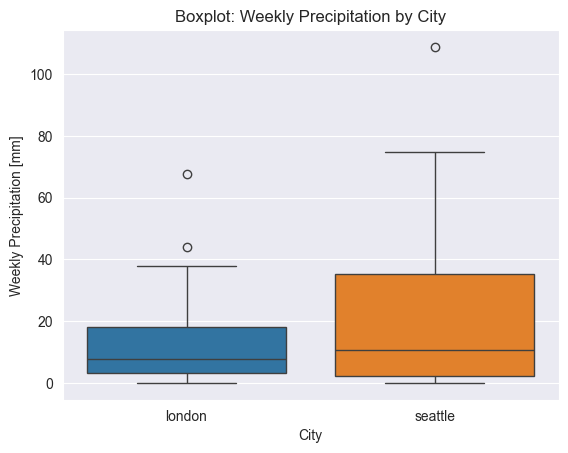

In [207]:
# Check data distribution
_ = sns.boxplot(data=df_city_data_weekly, y='precipitation_weekly_mm', x='city', hue='city')
_ = plt.xlabel('City')
_ = plt.ylabel('Weekly Precipitation [mm]')
_ = plt.title('Boxplot: Weekly Precipitation by City')

In [227]:
print('\nTotal Rainfall in 2022 by City:')
print(df_city_data_weekly.groupby('city')['precipitation_weekly_mm'].sum())

print()
df_city_data_weekly.groupby('city')[['precipitation_weekly_mm']].describe()


Total Rainfall in 2022 by City:
city
london      662.8
seattle    1131.2
Name: precipitation_weekly_mm, dtype: float64



precipitation_weekly_mm                                              \
                          count       mean        std  min  25%   50%   75%   
city                                                                          
london                     53.0  12.505660  13.632476  0.0  3.1   7.7  18.0   
seattle                    53.0  21.343396  23.928937  0.0  2.1  10.8  35.2   

                
           max  
city            
london    67.8  
seattle  108.8

In [232]:
print('\nTotal Rainfall in 2022 by City and Quarter:')
print(df_city_data_weekly.groupby(['city', 'quarter'])['precipitation_weekly_mm'].sum())


Total Rainfall in 2022 by City and Quarter:
city     quarter
london   2022Q1     118.6
         2022Q2     172.6
         2022Q3      88.8
         2022Q4     258.2
         2023Q1      24.6
seattle  2022Q1     398.7
         2022Q2     291.8
         2022Q3      30.2
         2022Q4     335.7
         2023Q1      74.8
Name: precipitation_weekly_mm, dtype: float64


**Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

- Overall London (663mm) had lower rainfall than Seattle (1,131mm) in 2022, which was almost 59% lower than Seattle.
- While it rains in both cities throughout the year, the seasonal pattern and trends are different. As seen in the boxplots IQR, London has less rainfall variability throughout the year as compared to Seattle.
  - London has less variability in rainfall throug the year, with the most rainfall in Q4 and least in Q3.
  - Whereas Seattle has more variability in its rainfall. It has very high rainfall in Q1 and Q4 (about 3x more than London), whereas less rainfall in Q3 (about 3x less than London).

In [236]:
# Save Data to CSV

file_name = 'combined_city_precipitation.csv'

df_city_data_weekly.to_csv(file_name)
print(f"data saved in file: {file_name}")

data saved in file: combined_city_precipitation.csv
